In [6]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [7]:

filesdir = "/ocean/gsgarbi/selected_days/"

dirs = os.listdir(filesdir)



Iona = (-123.30898284912109, 49.187351226806641)
S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)
xl=(-126.2,-122.2)
yl=(47.1,51)

In [71]:
def plot(points, title = 'title', picname = "noname", b=0):
    
    
    cmap = plt.get_cmap('nipy_spectral')
    cmap.set_bad('burlywood')


    plt.clf()
    start = dt.datetime.now()
    print ("start: ", start)

    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()
    
    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]


    griddata=0.0*tmask[0,0,:,:]
    griddata.shape


    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],
                                                  bins=[100,200],
                                                  range=[lonlim,latlim])


    Jedges,Iedges=np.meshgrid(jedges,iedges)
    

    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    mesh0.set_clim(vmin = 0)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    pos=axs.get_position()
    pos2=(pos.bounds[0],pos.bounds[1],pos.bounds[2]-.05,pos.bounds[3])
    axs.set_position(pos2)
    axs2 = plt.axes(pos2)
    viz_tools.set_aspect(axs,coords='map')
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')
    axsCB=plt.axes((pos2[0]+pos2[3],pos2[1],.02,pos2[3]))
    cbar = fig.colorbar(mesh0,cax=axsCB)
    cbar.set_label ("Counts")
    

    
    el = Ellipse((2, -1), 0.5, 0.5)

    axs2.annotate(
            "  IONA",
            xy=(Iona[0], Iona[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom', color = 'white',
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                      fc=(1,1,1), ec=(1., .5, .5),
                                      patchA=None,
                                      patchB=el,
                                      relpos=(0.2, 0.8),
                                      connectionstyle="arc3,rad=-0.1"))

    fb=nc.Dataset('/ocean/gsgarbi/revised_notebooks/ncfiles/bathymetry_201702.nc')

    B = np.copy(fb.variables ['Bathymetry'])
    LON = np.copy(fb.variables ['nav_lon'])
    LAT = np.copy(fb.variables ['nav_lat'])
    fb.close()
   
    axs2.contour(LON,LAT,B,levels=[50,], colors = ['w',], linewidths = [0.8,])
        
    xc = np.mean(points[:,1])
    yc = np.mean(points[:,2])
    xs = np.std(points[:,1])
    ys = np.std(points[:,2])
    
    axs2.plot(xc,yc,"kx", ms = 10)
    
    axs.set_title( title + "\n Total of trajectories: {} \n".format( 
        int(np.sum(griddata)) ) + "STD: ({}, {})".format(round(xs,2), 
                                                         round(ys,2)) +
                 " Centroid: ({}, {})".format (round(xc, 2), round(yc, 2))
                                                        )
    
    
    plt.savefig(picname, transparent = True)
    


In [2]:
def lessthan (filesdir, enddate, nday = 30, month =7, ppd = 72):
    
    first_mon = enddate - dt.relativedelta(day = nday)
    
    dirs = os.listdir(filesdir)
    
    #choose and format month
    m = month-1
    if len(str(m)) == 1:
        m = "0"+str(m)
    
    dirs = sorted ([i for i in dirs if i[4:6] == m])
    
    pts = []
    

    
    for i in dirs:
        
        for day in range (nday-1, -1,-1):
            
            traj_l = nday - day

            if "{}d.npy".format(traj_l) == i [18:]:

                array = np.load(open(filesdir + i, 'rb'))
                
                array = array [ppd*day:ppd*(day+1)]

                pts.append(array)
                


    pts = np.array([i for sublist in pts for i in sublist])

    
    return pts

In [73]:
def create_array(filesdir, nday):
    
    dirs = os.listdir(filesdir)

    dirs = sorted(dirs)
    
    pts = []
    
    for day in range (1, nday+1):
        

        for i in dirs:

            if "{}d.npy".format (day) == i [18:] and "2016" == i [:4]: #select length

                array = np.load(open(filesdir + i, 'rb'))

                pts.append(array)

    pts = np.array([i for sublist in pts for i in sublist])

    
    return pts

In [3]:
a = lessthan(filesdir)
print (a)

NameError: name 'filesdir' is not defined

start:  2017-06-28 17:55:47.857759


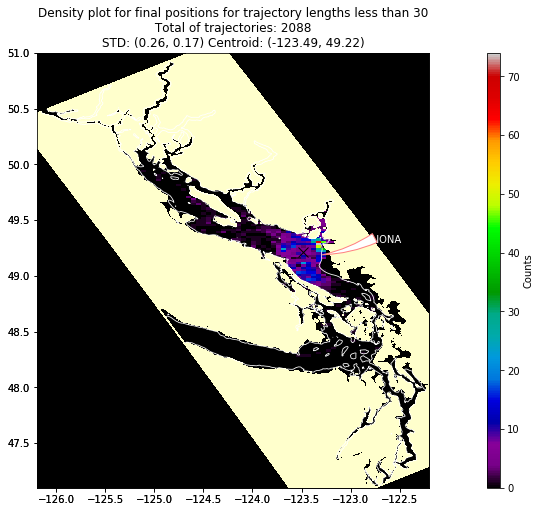

In [75]:
for month in (7,):



    points = lessthan(filesdir, month = month)


    title = (
        "Density plot for final positions for trajectory lengths less than {}".format(nday)
    )

    picname = "/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/{}_{}d_lessthan".format(month, nday)

    plot (points, title, picname)


    plt.show()

In [8]:
print (len(seasons['fall']))

6408


start:  2017-06-26 15:59:26.908664


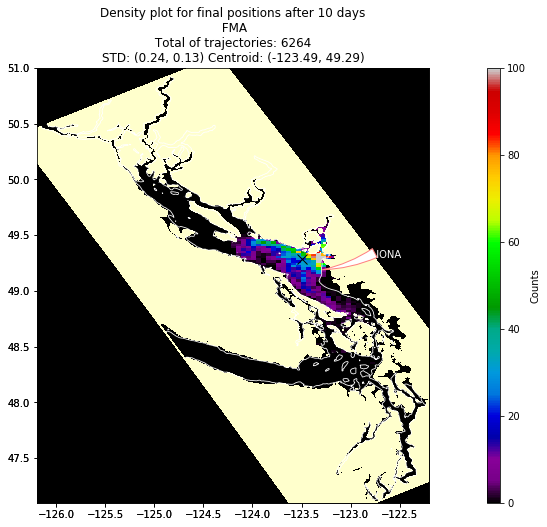

start:  2017-06-26 15:59:27.977196


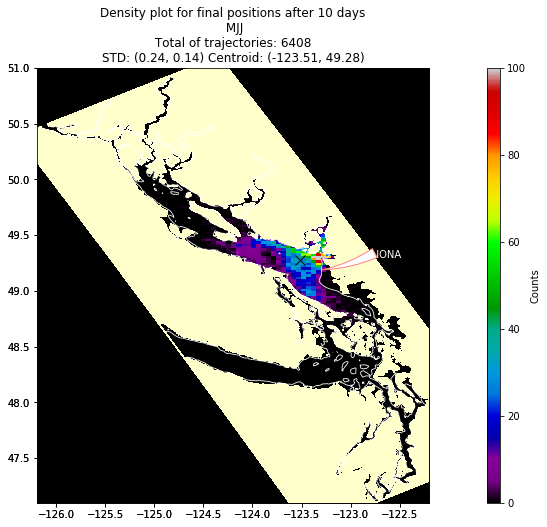

start:  2017-06-26 15:59:29.038020


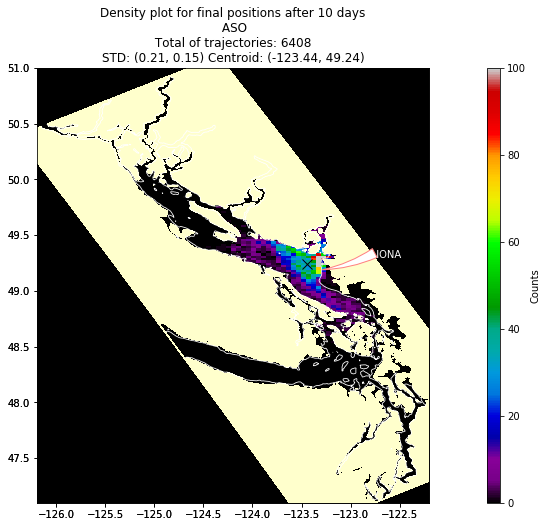

start:  2017-06-26 15:59:30.083700


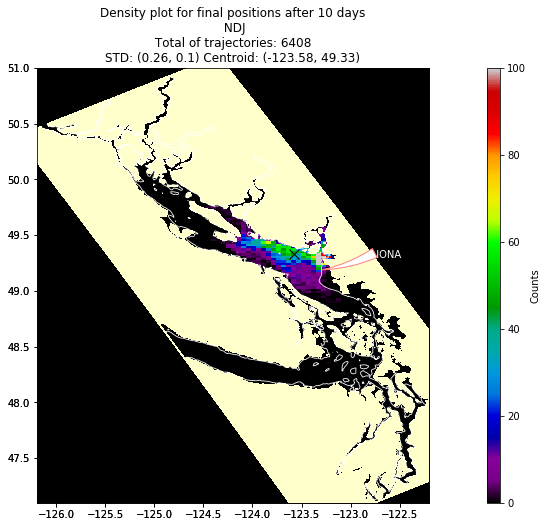

In [9]:
nday = 10
vmax = 100

for season in season_keys:
    
    seasons = select_files(nday)

    points = seasons[season]

    
    title = (
        "Density plot for final positions after {} days\n"
        " {}".format(nday, abv[season])
    )

    picname = "/ocean/gsgarbi/analysis-giorgio/plots/{}_{}".format(season, nday)

    plot (points, title, picname, b = 50)
    
    plt.show()

start:  2017-06-26 16:06:23.661715


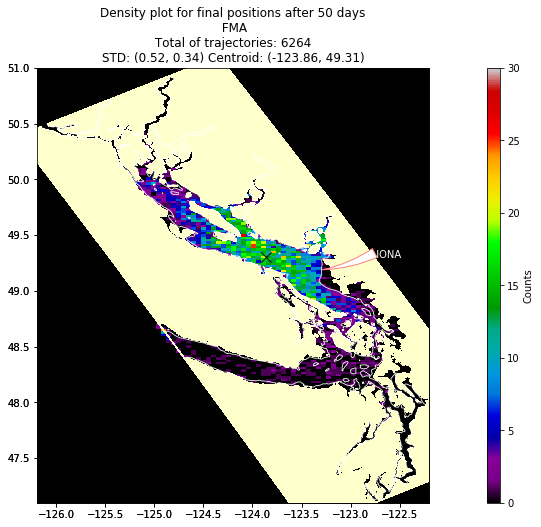

start:  2017-06-26 16:06:24.713127


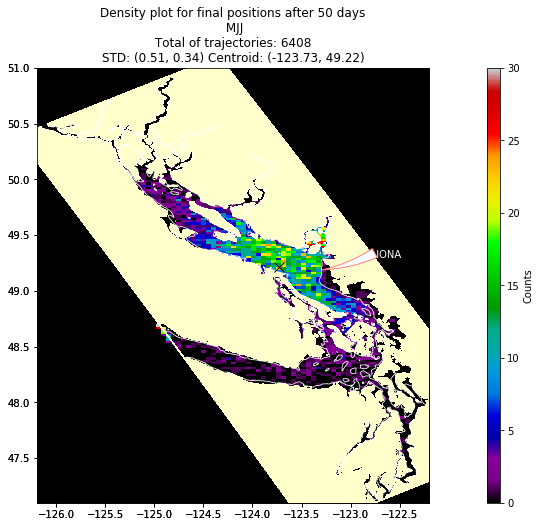

start:  2017-06-26 16:06:25.727396


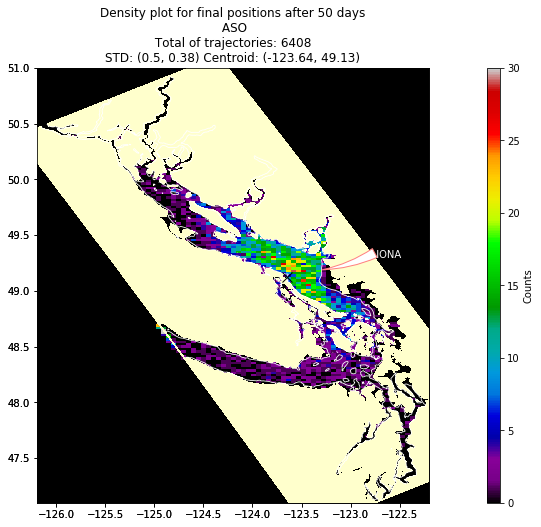

start:  2017-06-26 16:06:26.744689


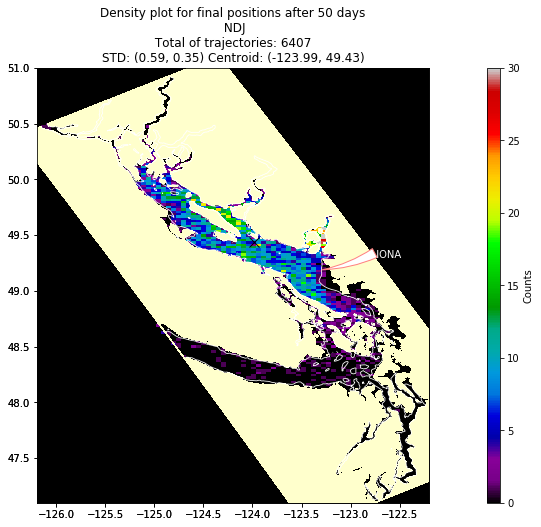

In [17]:
nday = 50
vmax = 30

for season in season_keys:
    
    seasons = select_files(nday)

    points = seasons[season]

    
    title = (
        "Density plot for final positions after {} days\n"
        " {}".format(nday, abv[season])
    )

    picname = "/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/{}d_{}.png".format(nday, abv[season])

    plot (points, title, picname)
    
    plt.plot
    
    plt.show()

/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/100d_FMA.png
start:  2017-06-26 16:08:28.992451


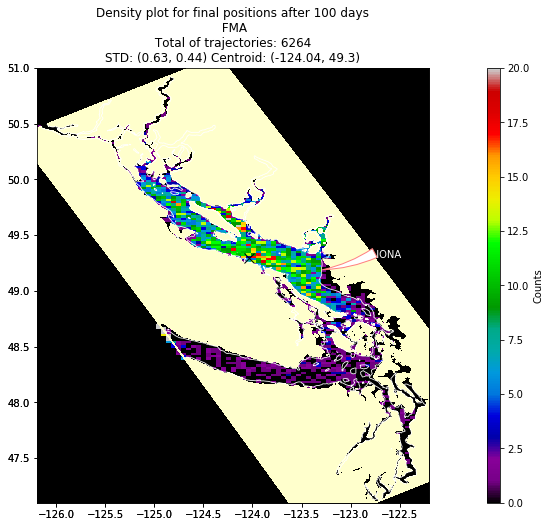

/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/100d_MJJ.png
start:  2017-06-26 16:08:30.061437


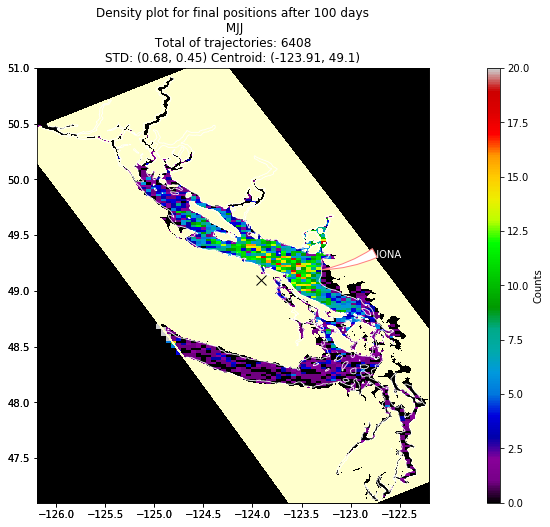

/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/100d_ASO.png
start:  2017-06-26 16:08:31.108276


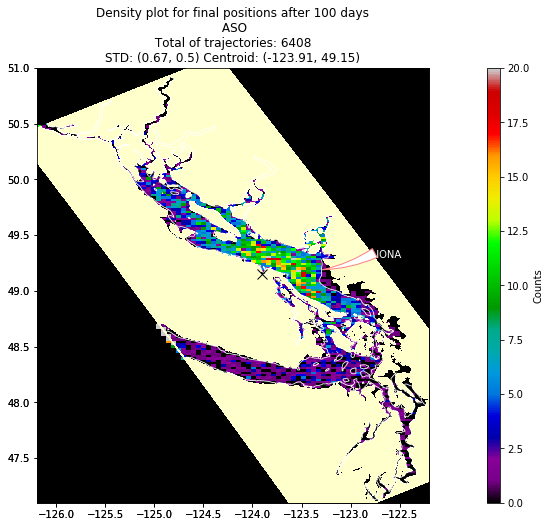

/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/100d_NDJ.png
start:  2017-06-26 16:08:32.133299


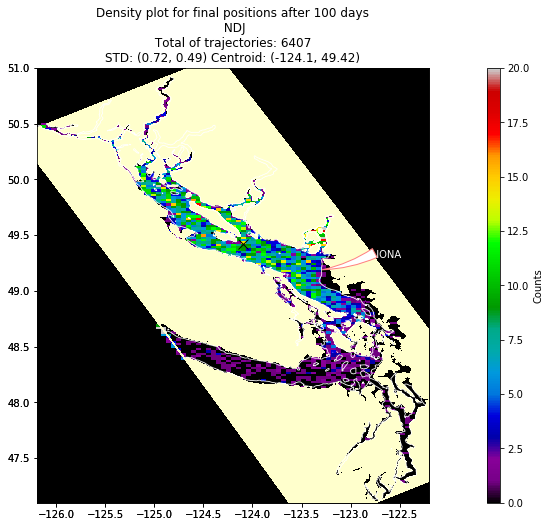

In [19]:
nday = 100
vmax = 20

for season in season_keys:
    
    seasons = select_files(nday)

    points = seasons[season]

    
    title = (
        "Density plot for final positions after {} days\n"
        " {}".format(nday, abv[season])
    )

    picname = "/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/{}d_{}.png".format(nday, abv[season])
    
    print (picname)

    plot (points, title, picname)
    
    plt.plot
    
    plt.show()


In [2]:
for i in range (30,1,-1):
    print (i)

30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2


In [12]:
plt.show()